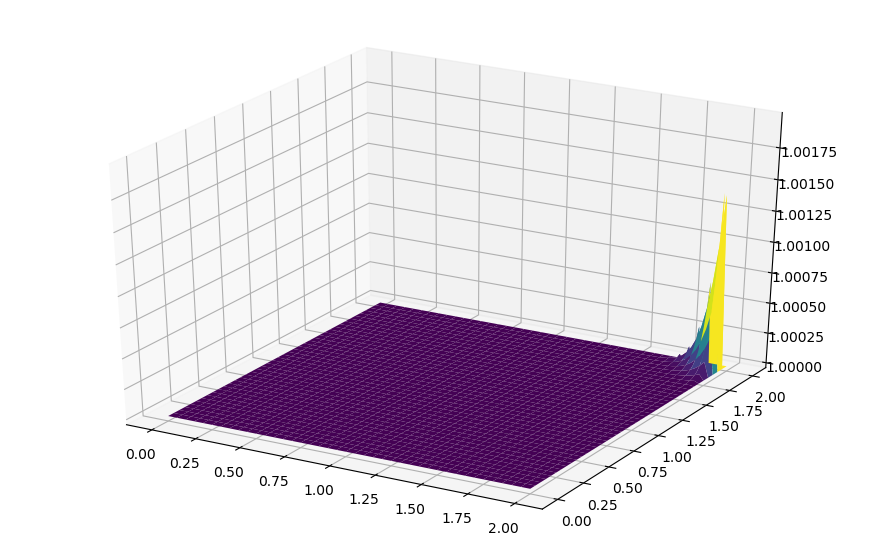

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

# Define domain
xlength = 2
ylength = 2

# Simulation params
nx = 81
ny = 81
nt = 350
c = 1
dx = xlength / (nx - 1)
dy = ylength / (ny - 1)
sigma = .2
dt = sigma * dx

# Setup simulation
x = np.linspace(0, xlength, nx)
y = np.linspace(0, ylength, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

# Setup initial conditions
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# Run sim
for n in range(nt + 1):
    un = u.copy()
    
    u[1:, 1:] = un[1:, 1:] - c * dt * ((un[1:, 1:] - un[1:, :-1]) / dx + (un[1:, 1:] - un[:-1, 1:]) / dy)
    
    # Boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)